# Crop Recommendation Model
#### As we all know importance of NPK in soil, So depending ondefferent parameters such as N, P, K , temperature, humidity, pH, rainfall this model is predicting the suitable crop for growing  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
#let's import our dataset
df = pd.read_csv('D:\Python Lectures\DataSet\Crop_recommendation.csv')

In [3]:
# let's see first five rows of our dataframe
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# let's see last five rows of our dataframe
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
#Unique values from the label column i.e Crops name.
unique = df['label'].unique()
unique

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
#let's check shape(rows x columns)
df.shape

(2200, 8)

In [7]:
#checking the variation of our independent veriabels for each crop, i.e. we have 100 different samples of N,P,K , temperature, humidity, pH, rainfall for each crop 
df['label'].value_counts()

pomegranate    100
muskmelon      100
apple          100
orange         100
blackgram      100
watermelon     100
jute           100
mungbean       100
maize          100
rice           100
pigeonpeas     100
papaya         100
coffee         100
mothbeans      100
coconut        100
kidneybeans    100
chickpea       100
banana         100
cotton         100
grapes         100
mango          100
lentil         100
Name: label, dtype: int64

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
#Grouping By 'label' for mean values 
avg_req = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].groupby('label').mean()
print('\n We can see here the average soil content for each corp')
avg_req.reset_index(inplace=True)
avg_req



 We can see here the average soil content for each corp


,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [10]:
few = avg_req.head(8)
u=few['label'].unique()
u

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes'], dtype=object)

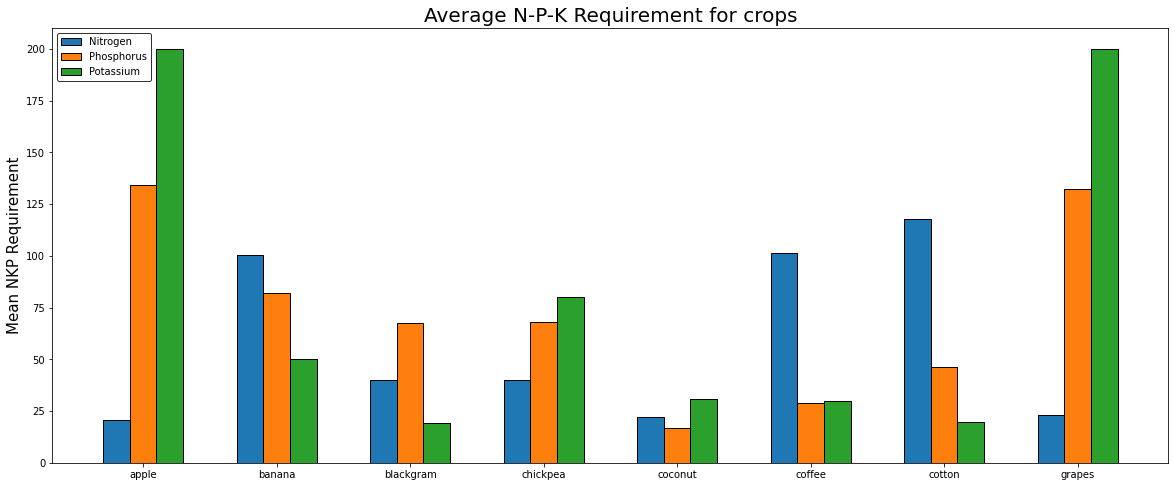

In [11]:
plt.figure(figsize=(20,8))
sec = np.arange(len(u))

plt.xticks(sec,u)

#get the values
n= few['N'].values
p=few['P'].values
k=few['K'].values
#create a bar plot
plt.bar(sec-0.2,n,width= 0.2,label='Nitrogen',edgecolor='k')
plt.bar(sec,p,width=0.2,label='Phosphorus',edgecolor='k')
plt.bar(sec+0.2,k,width=0.2,label='Potassium',edgecolor='k')
plt.ylabel('Mean NKP Requirement',fontsize=15)
plt.legend(edgecolor='k')
plt.title('Average N-P-K Requirement for crops',fontsize=20)


plt.show()

In above bar graph we can see the average requirement of nitrogen, phosphorus, and potassium for few crops of our dataset

Text(0.5, 1.0, 'Crops VS pH')

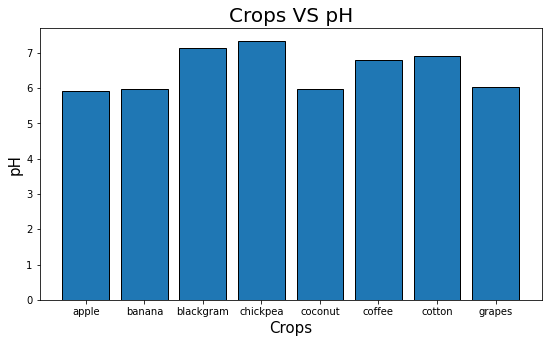

In [12]:
#pH values for some of the crops Showing with the help of bar graph
plt.figure(figsize=(9,5))

x = few['ph'].values
y = few['label'].values

plt.bar(y,x,edgecolor='k')
plt.xlabel('Crops',fontsize=15)
plt.ylabel('pH',fontsize=15)
plt.title('Crops VS pH',fontsize=20)


In [13]:
cotton = avg_req.iloc[6]
cotton.reset_index
cotton.keys

<bound method Series.keys of label           cotton
N               117.77
P                46.24
K                19.56
temperature     23.989
humidity       79.8435
ph             6.91268
rainfall        80.398
Name: 6, dtype: object>

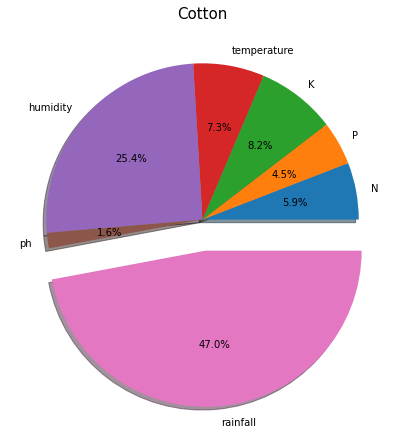

In [14]:
y = np.array([21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646])
mylabels = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
rain=[0,0,0,0,0,0,0.2]
plt.figure(figsize=(7,8))
plt.pie(y, labels = mylabels,shadow=True,autopct="%1.1f%%",explode = rain)
# plt.legend(title = "Parameters: ")
plt.title('Cotton',fontsize=15)
plt.show() 

Here we can say that rainfall is most important factor for cotton crop production 

In [16]:
#checking the correlation 
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In this heatmap we can see that phosphorus and potassium are directly propotional, which means phosphorus and 
potassium are most required elements in soil for better growth of crops  


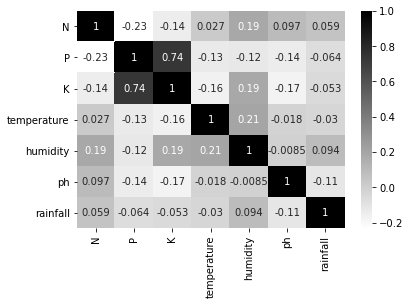

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='gist_yarg')
print('In this heatmap we can see that phosphorus and potassium are directly propotional, which means phosphorus and \npotassium are most required elements in soil for better growth of crops  ')

# Building model
### Random Forest Classifier

In [18]:
#Separating the dependent and independant verialbes
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']


In [19]:
# Training the model
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)


In [20]:
# fit the train model with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [21]:
Xtrain

,N,P,K,temperature,humidity,ph,rainfall
1936,113,38,25,22.000851,79.472710,7.388266,90.422242
610,28,35,22,29.530376,86.733460,7.156563,59.872321
372,11,61,21,18.623288,23.024103,5.532101,135.337803
1559,29,139,205,23.641424,93.744615,6.155939,116.691218
1500,24,128,196,22.750888,90.694892,5.521467,110.431786
...,...,...,...,...,...,...,...
1071,105,88,54,25.787498,84.511942,6.020445,114.200546
433,27,71,23,23.453790,46.487148,7.109598,150.871220
674,23,39,22,29.256493,81.979522,6.864839,42.024833
1099,117,81,53,29.507046,78.205856,5.507642,98.125658


In [22]:
RF.predict([[50,34,34,23,77,7.5,100]])

array(['pomegranate'], dtype=object)

## Saving the trained model

In [23]:
import pickle
#Dump the trained model 
fn="Corp_recomend.pkl"
pickle.dump(RF,open(fn,'wb'))


Loading the model using pickle.load

In [24]:
#Loading the trained model  
CR = pickle.load(open("Corp_recomend.pkl",'rb'))

In [25]:
CR.predict([[100,14,34,23,77,7.5,100]])[0]

'cotton'